In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
original_img = plt.imread('Data/rocks.jpg')

(-0.5, 735.5, 980.5, -0.5)

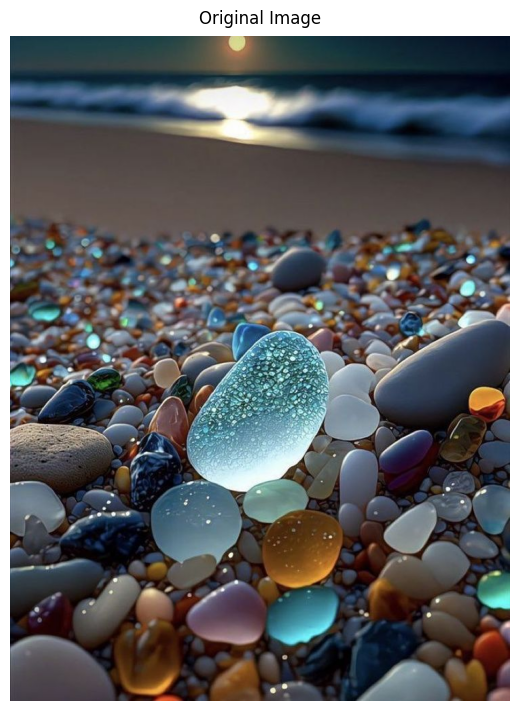

In [3]:
fig, ax = plt.subplots(constrained_layout = True)
fig.suptitle('Original Image')
fig.set_size_inches(6,7)

ax.imshow(original_img)
ax.axis(False)

In [30]:
len(np.unique(original_img.reshape(-1,3),axis = 0))

160310

In [4]:
# Showing 9 total pixels starting at the top left corner
print(f'The sample layout of the original image is as follows: \n{original_img[:3,:3,:]}')
print(f'The shape of the original image is: {original_img.shape}')

The sample layout of the original image is as follows: 
[[[20 52 67]
  [22 54 69]
  [24 56 71]]

 [[20 52 67]
  [22 54 69]
  [24 56 71]]

 [[21 53 68]
  [22 54 69]
  [24 56 71]]]
The shape of the original image is: (981, 736, 3)


In [5]:
# Analyze the original image size
print(f'The size of each pixel in the original image is: {original_img.itemsize *3} bytes or {original_img.itemsize * 8 * 3} bits')
print(f'The total size of the image is : {original_img.size} bytes or {original_img.size * 8} bits')

The size of each pixel in the original image is: 3 bytes or 24 bits
The total size of the image is : 2166048 bytes or 17328384 bits


In [6]:
# Reshape the image into a m x 3 array where m = 981 * 736 = 722016 examples
# Normalize RGB values from range 0-255 to 0-1 to avoid bias

X = original_img.reshape(-1,3) / 255
print(f'New shape of original image : {X.shape}',end = '\n')
print(f'First 5 pixel RGB values: \n{X[:5]}')

New shape of original image : (722016, 3)
First 5 pixel RGB values: 
[[0.07843137 0.20392157 0.2627451 ]
 [0.08627451 0.21176471 0.27058824]
 [0.09411765 0.21960784 0.27843137]
 [0.09411765 0.21960784 0.27843137]
 [0.09019608 0.21568627 0.2745098 ]]


In [7]:
class k_means():
    def __init__(self, X, clusters,max_iters = 15):
        self.X = X
        self.k = clusters
        self.centroids = np.zeros((clusters, X.shape[1]))
        self.idx = np.zeros(self.X.shape[0], dtype = int)

        self.train_model(max_iters)

        


    def init_centroids(self):
        random_locations = np.random.choice(len(self.X),self.k,replace = False)
        initial_centroids = self.X[random_locations,:]
        self.centroids = initial_centroids
        return initial_centroids

    def calculate_clusters(self):
        distances = np.linalg.norm(self.X[:, np.newaxis] - self.centroids, axis=2)
        self.idx = np.argmin(distances, axis=1)
        return self.idx
        

    def move_centroids(self):
        for k in range(self.k):
            if len(self.idx[self.idx == k]) ==0:
                continue
            self.centroids[k,:] =  np.mean(self.X[self.idx == k],axis =0)
        return self.centroids

    def compute_loss(self):
        loss = np.sum((self.X - self.centroids[self.idx]) ** 2, axis = 1)
        return np.mean(loss)
        


    def train_model(self,max_iters):
        self.init_centroids()
        
        loss_hist =[]
        prev_idx = None
        prev_centroids = None
        
        for i in range(max_iters):
            self.calculate_clusters()
            loss_hist.append(self.compute_loss())
            self.move_centroids()

            if prev_idx is not None and prev_centroids is not None:
                # Check if indices of clusters have not changed
                if np.array_equal(prev_idx, self.idx):
                    print(f"Converged after {i+1} iterations (indices unchanged).")
                    break
                # Check if centroids have converged within the threshold
                if np.all(np.abs(prev_centroids - self.centroids) < 0.005):
                    print(f"Converged after {i+1} iterations (centroids unchanged within threshold).")
                    break

            prev_idx = np.copy(self.idx)  
            prev_centroids = np.copy(self.centroids)  # Ensure a deep copy is made
            
        
        self.loss_hist = loss_hist

    def get_result(self):
        return self.centroids, self.loss_hist, self.idx
            
            
            
            
                
            

In [31]:
num_learners = 5
colors = 15
models = []
for i in range(num_learners):
    model = k_means(X,colors,30)
    models.append(model)
    print(f'Finished Training Model {i+1} ')


Converged after 16 iterations (centroids unchanged within threshold).
Finished Training Model 1 
Converged after 25 iterations (centroids unchanged within threshold).
Finished Training Model 2 
Converged after 25 iterations (centroids unchanged within threshold).
Finished Training Model 3 
Converged after 15 iterations (centroids unchanged within threshold).
Finished Training Model 4 
Finished Training Model 5 


In [32]:
best_loss = float('inf')
best_colors = None
pixel_loc = None
for model in models:
    centroids, losses, idx = model.get_result()
    if losses[len(losses) -1 ] < best_loss:
        best_loss = losses[len(losses) -1 ]
        best_colors = centroids
        pixel_loc = idx
        


    
    

In [10]:
best_loss

0.02080386320381702

In [11]:
best_colors 

array([[0.6510184 , 0.72981431, 0.73397898],
       [0.33925059, 0.2795347 , 0.24986337],
       [0.11613763, 0.08742432, 0.09708215],
       [0.16646944, 0.23444257, 0.29028735],
       [0.3856649 , 0.4324257 , 0.46736646]])

In [12]:
idx

array([3, 3, 3, ..., 4, 4, 4])

(-0.5, 735.5, 980.5, -0.5)

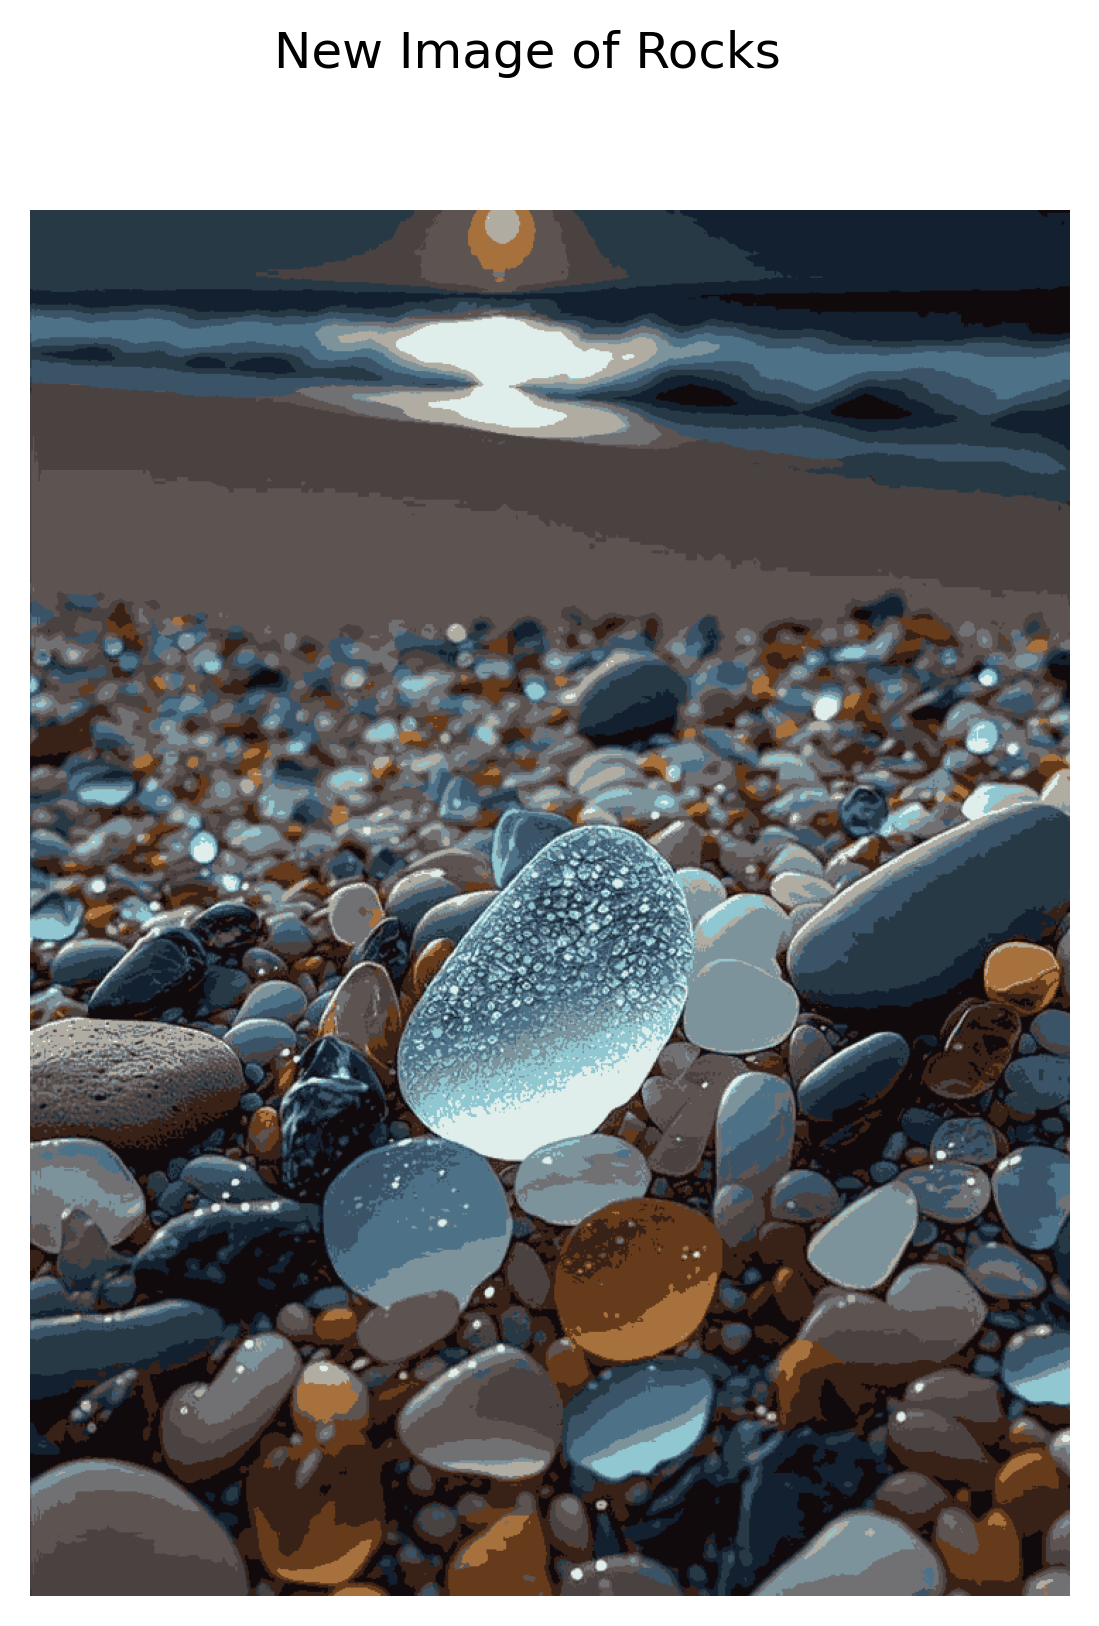

In [33]:
new_img = best_colors[pixel_loc].reshape(981,736,3)
fig, ax = plt.subplots()

fig.suptitle('New Image of Rocks')
fig.set_size_inches(6,6)
fig.set_dpi(300)

ax.imshow(new_img)
ax.axis(False)

In [67]:
fluids_orig = plt.imread('Data/fluids.jpg')


In [68]:
len(np.unique(fluids_orig.reshape(-1,3),axis = 0))

230720

(-0.5, 625.5, 625.5, -0.5)

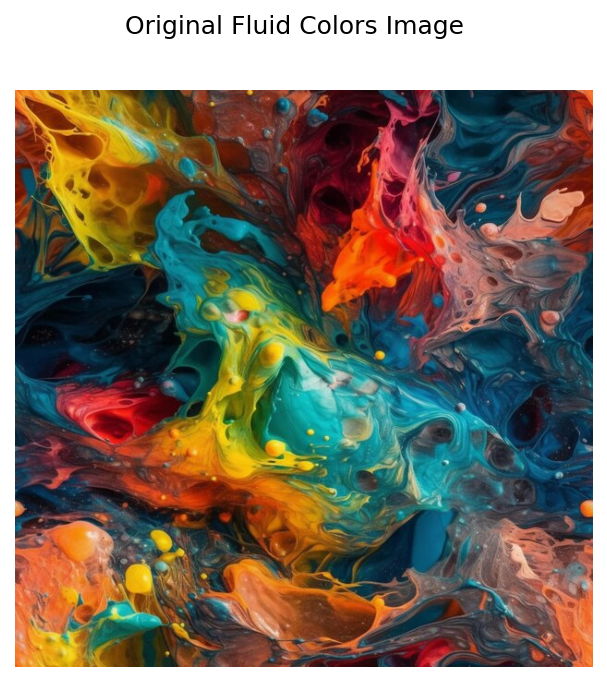

In [69]:
fig, ax = plt.subplots()

fig.suptitle('Original Fluid Colors Image')

fig.set_size_inches(5,5)
fig.set_dpi(150)

ax.imshow(fluids_orig)
ax.axis(False)

In [70]:
fluids_orig.shape

(626, 626, 3)

In [71]:
fluids = fluids_orig.reshape(-1,3) / 255

In [72]:
fluids.shape

(391876, 3)

In [73]:
num_learners = 5
colors =12
models = []
for i in range(num_learners):
    model = k_means(fluids,colors,30)
    models.append(model)
    print(f'Finished Training Model {i+1} ')


Converged after 29 iterations (centroids unchanged within threshold).
Finished Training Model 1 
Finished Training Model 2 
Converged after 15 iterations (centroids unchanged within threshold).
Finished Training Model 3 
Finished Training Model 4 
Converged after 13 iterations (centroids unchanged within threshold).
Finished Training Model 5 


In [74]:
best_loss = float('inf')
best_colors = None
pixel_loc = None
for model in models:
    centroids, losses, idx = model.get_result()
    if losses[-1] < best_loss:
        best_loss = losses[-1]
        best_colors = centroids
        pixel_loc = idx
        


In [75]:
for model in models:
    centroids, losses, idx = model.get_result()
    print(losses)

[0.030630104928208394, 0.021101345323272198, 0.019477605646849725, 0.01882312072412855, 0.018510239641946997, 0.01831882634352589, 0.018170068604169892, 0.01803345501601548, 0.017898174695975832, 0.017762893806543622, 0.017624706387558954, 0.017483754044860064, 0.01735848615174182, 0.017258600997875632, 0.017181109999824664, 0.017120269374275153, 0.017073042970900065, 0.017034391110766364, 0.017001441598824545, 0.016973740596991246, 0.016950434326409778, 0.016931459334619908, 0.01691489799625026, 0.016900642077932963, 0.016889545274458, 0.016881279147768005, 0.01687464864875235, 0.016869724000558625, 0.016865868601986262]
[0.06341668824780937, 0.02828744690481671, 0.023000611463454865, 0.021642228308725288, 0.020668330839411178, 0.01976712104666588, 0.019042943090775248, 0.018537749082977645, 0.0181953907077564, 0.017954370011061815, 0.017784837039020642, 0.01767015907882805, 0.017594179891998164, 0.017542698669281723, 0.01750441181713757, 0.01747529013198199, 0.017452388156835183, 0.0

(-0.5, 625.5, 625.5, -0.5)

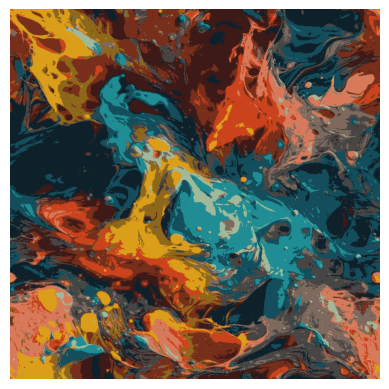

In [76]:
new_img = best_colors[pixel_loc].reshape(626,626,3)
plt.imshow(new_img)
plt.axis(False)
    
    

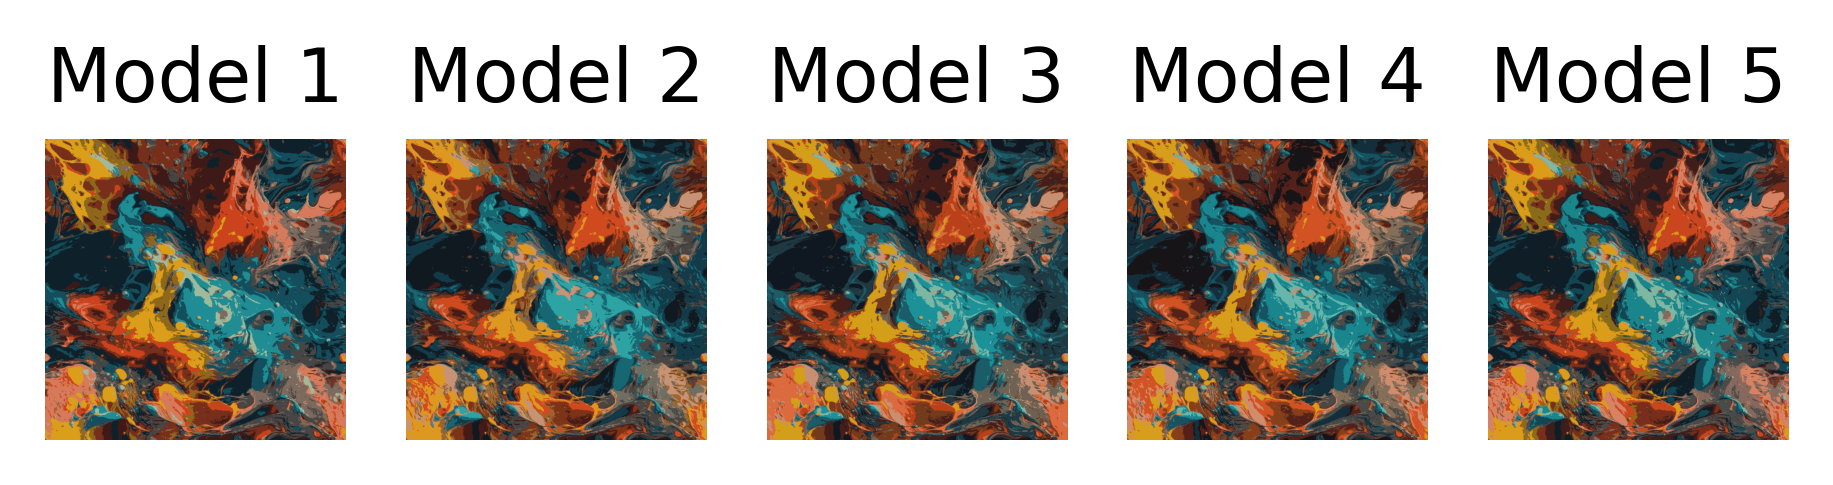

In [77]:
fig, ax = plt.subplots(1, num_learners)
fig.set_size_inches(5,5)
fig.set_dpi(450)
for i in range(num_learners):
    centroids, losses, idx = models[i].get_result()
    new_img = centroids[idx].reshape(626,626,3)
    
    
    ax[i].set_title(f'Model {i+1}')
   
    
    ax[i].imshow(new_img)
    ax[i].axis(False)

In [78]:
best_colors

array([[0.24242462, 0.10353457, 0.09154172],
       [0.85967994, 0.62158846, 0.10295869],
       [0.1232593 , 0.55672811, 0.57813559],
       [0.79366853, 0.26362356, 0.11018929],
       [0.55644902, 0.41111459, 0.10691197],
       [0.49180033, 0.41521041, 0.37163668],
       [0.84015173, 0.47864711, 0.35846854],
       [0.46732665, 0.18195144, 0.10477333],
       [0.07989545, 0.30379818, 0.35727911],
       [0.05832736, 0.1316202 , 0.16943277],
       [0.27993352, 0.27738569, 0.26876397],
       [0.62717603, 0.72803963, 0.60715728]])

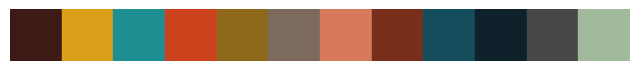

In [79]:
# Example RGB values
rgb_values = best_colors
# Normalize RGB values to range [0, 1] for matplotlib
rgb_values_normalized = np.array(rgb_values) 

# Create a plot to display colors
fig, ax = plt.subplots(figsize=(8, 2))

# Remove axes
ax.set_axis_off()

# Create patches
for i, color in enumerate(rgb_values_normalized):
    rect = plt.Rectangle((i, 0), 1, 1, color=color)
    ax.add_patch(rect)

# Set limits and aspect
ax.set_xlim(0, len(rgb_values))
ax.set_ylim(0, 1)
ax.set_aspect('equal')

plt.show()